Building the Winning Team with KBO data

https://www.kaggle.com/rezameri/simple-eda-to-build-the-winning-team/notebook

The goal is to find the most influential element stats in baseball record and to check that which players are fitted for that.



Data

Regular_Season_Batter.csv  
(https://dacon.io/competitions/official/62540/data/)

(https://drive.google.com/file/d/116OV5ysXKG3dgJ9V79U_kISFy1-r8CUD/view?usp=sharing)

kbo_team_stat.csv

(http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=0&ys=2015&ye=2020&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=Year&o2=AB&de=1&lr=1&tr=&cv=&ml=1&sn=30&si=&cn=AVG,,0,RBI,,0)

(https://drive.google.com/file/d/18rEIWCdRoJS6_r8luZlvT2yN5Gzi3CQ9/view?usp=sharing


Library

In [ ]:
install.packages("dplyr")
install.packages("tidyverse")
install.packages("tidyr")
install.packages("broom")
install.packages("pillar")
install.packages("lubridate") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)
library(tidyverse)
library(tidyr)
library(broom)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Data Loading $ Structure

In [ ]:
system("gdown --id 116OV5ysXKG3dgJ9V79U_kISFy1-r8CUD")
bat <- read.csv("Regular_Season_Batter.csv",header=T,fileEncoding = "euc-kr")

system("gdown --id 18rEIWCdRoJS6_r8luZlvT2yN5Gzi3CQ9")
team <- read.csv("kbo_team_stat.csv",header=T,fileEncoding = "euc-kr")

In [ ]:
head(bat)

,batter_id,batter_name,year,team,avg,G,AB,R,H,X2B,⋯,GDP,SLG,OBP,E,height.weight,year_born,position,career,starting_salary,OPS
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,0,가르시아,2018,LG,0.339,50,183,27,62,9,⋯,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),,0.902
2,1,강경학,2011,한화,0.000,2,1,0,0,0,⋯,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
3,1,강경학,2014,한화,0.221,41,86,11,19,2,⋯,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
4,1,강경학,2015,한화,0.257,120,311,50,80,7,⋯,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
5,1,강경학,2016,한화,0.158,46,101,16,16,3,⋯,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489
6,1,강경학,2017,한화,0.214,59,84,17,18,2,⋯,1,0.262,0.290,4,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.552


In [ ]:
head(team)

,이름,연도,타석,타수,득점,안타,X2타,X3타,홈런,루타,⋯,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,NC,2020,5833,5102,888,1483,258,28,187,2358,⋯,104,21,997,106,46,51,0.291,0.366,0.462,0.828
2,KT,2020,5762,5047,813,1432,238,21,163,2201,⋯,52,20,1097,104,64,45,0.284,0.358,0.436,0.794
3,두산,2020,5773,5043,816,1476,263,20,125,2154,⋯,67,20,796,132,38,73,0.293,0.365,0.427,0.792
4,LG,2020,5681,4999,802,1384,253,29,149,2142,⋯,75,21,969,115,49,49,0.277,0.349,0.428,0.778
5,롯데,2020,5669,4958,750,1366,252,6,131,2023,⋯,55,18,875,148,39,48,0.276,0.354,0.408,0.762
6,키움,2020,5721,4945,759,1332,254,25,127,2017,⋯,73,16,1030,107,43,52,0.269,0.355,0.408,0.762


In [ ]:
str(bat)

'data.frame':	2454 obs. of  29 variables:
 $ batter_id      : int  0 1 1 1 1 1 1 2 2 2 ...
 $ batter_name    : chr  "가르시아" "강경학" "강경학" "강경학" ...
 $ year           : int  2018 2011 2014 2015 2016 2017 2018 2013 2015 2016 ...
 $ team           : chr  "LG" "한화" "한화" "한화" ...
 $ avg            : num  0.339 0 0.221 0.257 0.158 0.214 0.278 0 0.2 0 ...
 $ G              : int  50 2 41 120 46 59 77 2 4 2 ...
 $ AB             : int  183 1 86 311 101 84 245 2 5 3 ...
 $ R              : int  27 0 11 50 16 17 42 0 0 0 ...
 $ H              : int  62 0 19 80 16 18 68 0 1 0 ...
 $ X2B            : int  9 0 2 7 3 2 11 0 1 0 ...
 $ X3B            : int  0 0 3 4 2 1 1 0 0 0 ...
 $ HR             : int  8 0 1 2 1 0 5 0 0 0 ...
 $ TB             : int  95 0 30 101 26 22 96 0 2 0 ...
 $ RBI            : int  34 0 7 27 7 4 27 0 0 0 ...
 $ SB             : int  5 0 0 4 0 1 6 0 0 0 ...
 $ CS             : int  0 0 0 3 0 1 3 0 0 0 ...
 $ BB             : int  9 0 13 40 8 8 38 0 0 0 ...
 $ HBP            : i

In [ ]:
str(team)

'data.frame':	60 obs. of  24 variables:
 $ 이름: chr  "NC" "KT" "두산" "LG" ...
 $ 연도: int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ 타석: int  5833 5762 5773 5681 5669 5721 5637 5574 5483 5502 ...
 $ 타수: int  5102 5047 5043 4999 4958 4945 4933 4923 4862 4839 ...
 $ 득점: int  888 813 816 802 750 759 724 699 551 634 ...
 $ 안타: int  1483 1432 1476 1384 1366 1332 1353 1317 1189 1212 ...
 $ X2타: int  258 238 263 253 252 254 224 211 195 177 ...
 $ X3타: int  28 21 20 29 6 25 13 12 12 17 ...
 $ 홈런: int  187 163 125 149 131 127 130 129 79 143 ...
 $ 루타: int  2358 2201 2154 2142 2023 2017 1993 1939 1645 1852 ...
 $ 타점: int  845 767 776 760 711 713 692 658 523 595 ...
 $ 도루: int  101 106 88 83 90 113 47 132 51 81 ...
 $ 도실: int  38 50 37 39 31 26 25 49 36 45 ...
 $ 볼넷: int  529 554 552 509 569 608 534 486 462 511 ...
 $ 사구: int  104 52 67 75 55 73 69 62 89 69 ...
 $ 고4 : int  21 20 20 21 18 16 10 10 9 18 ...
 $ 삼진: int  997 1097 796 969 875 1030 957 990 1163 981 ...
 $ 병살: int  106 104 

Variable(Terminology) Explanation

|Terminology|Explanation|
|---|------|
|PA.타석|타석에 선 타격 기회 횟수 |
|AB.타수|타석 - (볼넷+사구+희생타)|
|OB.출루|타석에 선 후 진루에 성공하는 것|
|BB.볼넷|볼 4개를 얻어 출루|
|HBP.사구|공을 몸에 맞아 출루|
|H.안타|타격에 성공해 출루|
|TB.루타|1루타x1 + 2루타x2 + 3루타x3 + 홈런x4|
|HR.홈런|공을 담장 밖으로 넘긴 타격|
|R.득점|출루 후 홈으로 돌아와 얻은 점수|
|RBI.타점|타격을 통해 주자들을 득점시켜 얻은 점수|
|SO.삼진|스트레이크 3개를 받아서 당한 아웃|
|SB.도루|루 상의 주자 단독으로 진루하는 것|
|AVG.타율|안타/타수|
|OBP.출루율|출루/타석|
|SLG.장타율|루타/타수|
|OPS|출루율+장타율|

데이터 전처리 - 변수 

In [ ]:
colnames(bat)
colnames(team)

[1] "batter_id"       "batter_name"     "year"            "team"           
 [5] "avg"             "G"               "AB"              "R"              
 [9] "H"               "X2B"             "X3B"             "HR"             
[13] "TB"              "RBI"             "SB"              "CS"             
[17] "BB"              "HBP"             "SO"              "GDP"            
[21] "SLG"             "OBP"             "E"               "height.weight"  
[25] "year_born"       "position"        "career"          "starting_salary"
[29] "OPS"

[1] "이름" "연도" "타석" "타수" "득점" "안타" "X2타" "X3타" "홈런" "루타"
[11] "타점" "도루" "도실" "볼넷" "사구" "고4"  "삼진" "병살" "희타" "희비"
[21] "타율" "출루" "장타" "OPS"

In [ ]:
# 변수 추가
age <- year(Sys.Date()) - year(as.Date(bat$year_born,'%Y년 %m월 %d일'))
bat <- cbind(bat,age)

G <- rep(144,60) 
team <- cbind(team,G)

In [ ]:
# 변수 제거
bat <- select(bat, -c(GDP,height.weight,year_born,career,starting_salary))

team <- select(team, -c(고4,희타,희비,병살))

In [ ]:
# 변수명 변경
bat <- rename(bat,AVG=avg) 
team <- rename(team,team_name=이름,year=연도,PA=타석,AB=타수,R=득점,H=안타,X2B=X2타,X3B=X3타,HR=홈런,TB=루타,RBI=타점,SB=도루,CS=도실,BB=볼넷,HBP=사구,SO=삼진,AVG=타율,OBP=출루,SLG=장타)

In [ ]:
colnames(bat)
colnames(team)

[1] "batter_id"   "batter_name" "year"        "team"        "AVG"        
 [6] "G"           "AB"          "R"           "H"           "X2B"        
[11] "X3B"         "HR"          "TB"          "RBI"         "SB"         
[16] "CS"          "BB"          "HBP"         "SO"          "SLG"        
[21] "OBP"         "E"           "position"    "OPS"         "age"

[1] "team_name" "year"      "PA"        "AB"        "R"         "H"        
 [7] "X2B"       "X3B"       "HR"        "TB"        "RBI"       "SB"       
[13] "CS"        "BB"        "HBP"       "SO"        "AVG"       "OBP"      
[19] "SLG"       "OPS"       "G"

데이터 전처리 - 결측치 처리 / 30타수 이하 제거

In [ ]:
 # 결측치가 있는 열 
 colSums(is.na(bat))  
 colSums(is.na(team)) 

batter_id batter_name        year        team         AVG           G 
          0           0           0           0          26           0 
         AB           R           H         X2B         X3B          HR 
          0           0           0           0           0           0 
         TB         RBI          SB          CS          BB         HBP 
          0           0           0           0           0           0 
         SO         SLG         OBP           E    position         OPS 
          0          26          24           0           0          26 
        age 
          0

team_name      year        PA        AB         R         H       X2B       X3B 
        0         0         0         0         0         0         0         0 
       HR        TB       RBI        SB        CS        BB       HBP        SO 
        0         0         0         0         0         0         0         0 
      AVG       OBP       SLG       OPS         G 
        0         0         0         0         0

In [ ]:
# 결측치 리스트
bat %>% filter(complete.cases(bat)=="FALSE") %>% select(batter_name, year, SLG, OBP, OPS)

batter_name,year,SLG,OBP,OPS
<chr>,<int>,<dbl>,<dbl>,<dbl>
백승룡,2013,NA,NA,NA
권용관,2000,NA,NA,NA
김강민,2002,NA,NA,NA
김동욱,2007,NA,NA,NA
김성현,2007,NA,NA,NA
마낙길,2015,NA,NA,NA
박해민,2013,NA,NA,NA
손주인,2002,NA,NA,NA
양영동,2006,NA,NA,NA


In [ ]:
# 1. 결측치 가진 타자들의 경기수, 타수
bat %>% filter(complete.cases(bat)=="FALSE") %>% select(batter_name, year, G, AB)

batter_name,year,G,AB
<chr>,<int>,<int>,<int>
백승룡,2013,2,0
권용관,2000,3,0
김강민,2002,1,0
김동욱,2007,1,0
김성현,2007,3,0
마낙길,2015,1,0
박해민,2013,1,0
손주인,2002,1,0
양영동,2006,2,0


In [ ]:
# 2. 매우 높은 타율(0.400이상)을 가진 선수들의 경기수 , 타수
bat %>% filter(AVG>0.400) %>% select(AVG, batter_name, year, G, AB)

AVG,batter_name,year,G,AB
<dbl>,<chr>,<int>,<int>,<int>
0.412,진갑용,2014,11,17
0.500,강진성,2013,3,2
1.000,권정웅,2016,3,1
0.500,김강민,2003,2,4
0.500,김경언,2009,2,2
0.625,김광연,2013,4,8
0.500,김동욱,2013,4,2
0.500,홍성갑,2014,2,2
1.000,김성현,2006,5,1


In [ ]:
# 타수가 낮은 선수들에게서 결측값과 극단적인 비율 기록이 나타나므로, 35타수 이하 선수들의 항목을 제거한다.
bat <- bat %>% filter(AB>35)

In [ ]:
sum(is.na(bat))

[1] 0

team 데이터로 득점에 유의한 변수 찾기

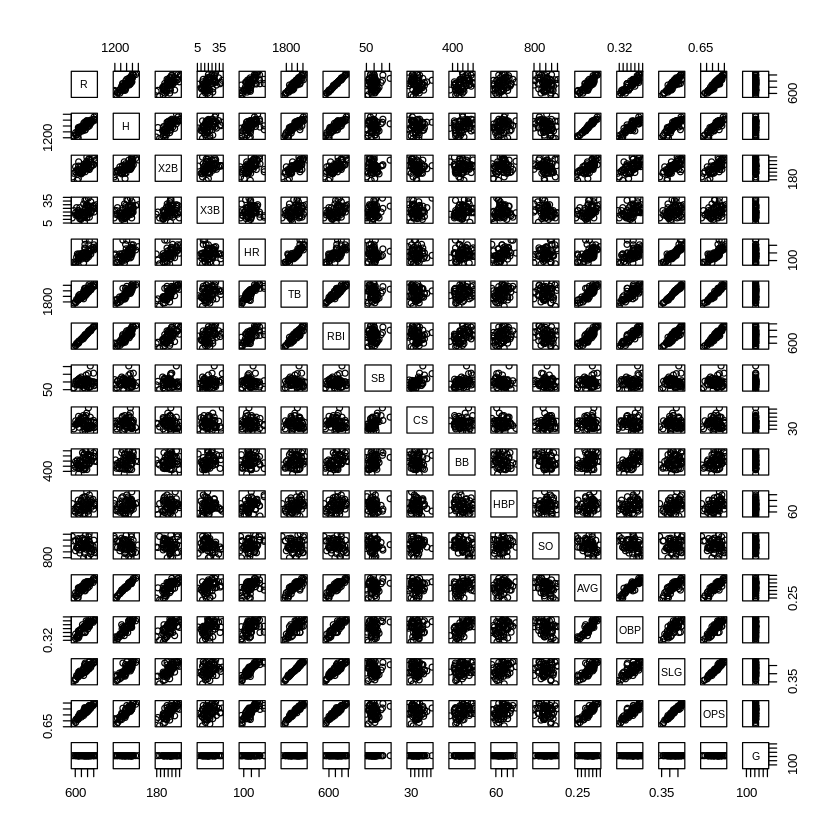

In [ ]:
# Scatterplot for team data
plot(team[,c(5:21)])

[1] 0.8979983

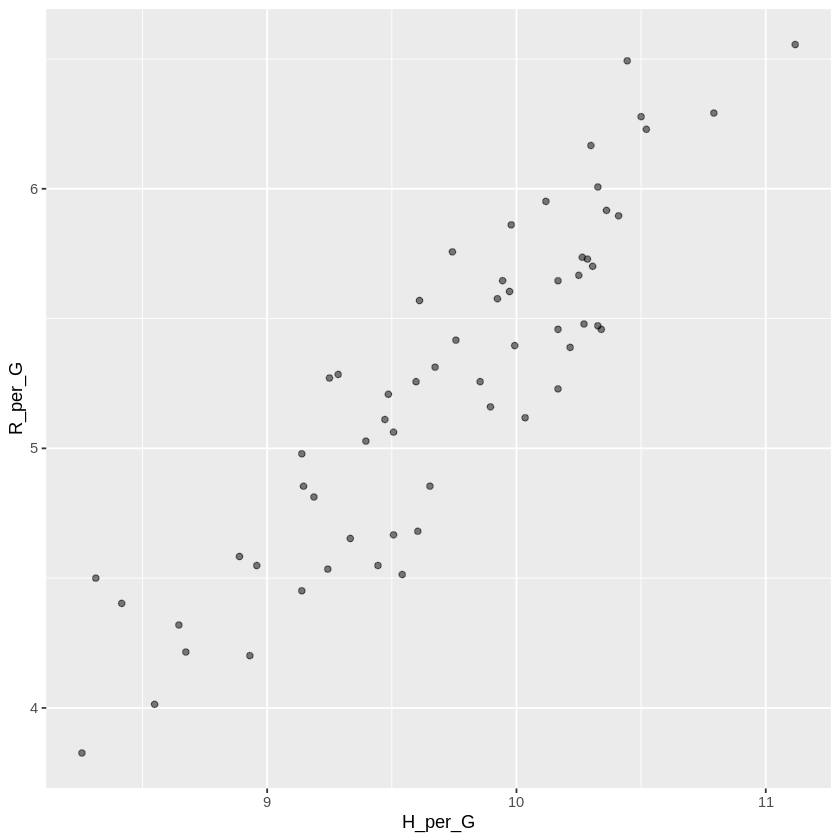

In [ ]:
# (Scatterplot & Correlation Coefficient) of H and R 
team %>% mutate(H_per_G = H / G, R_per_G = R / G) %>%
  ggplot(aes(H_per_G, R_per_G)) + 
  geom_point(alpha = 0.5)

cor(team$H,team$R)

[1] 0.6983669

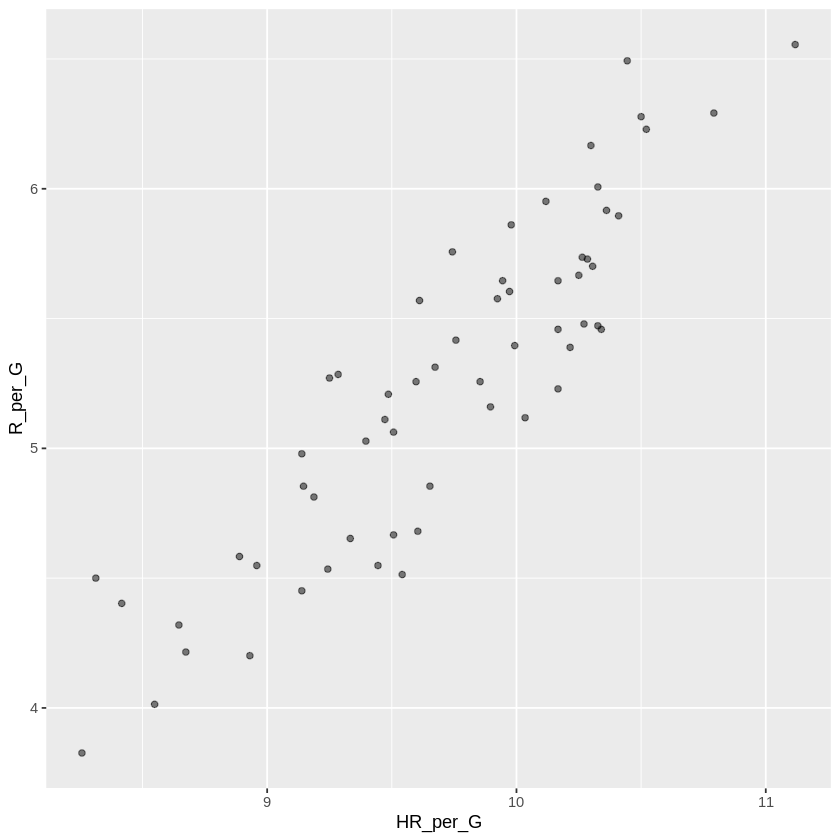

In [ ]:
# (Scatterplot & Correlation Coefficient) of HR and R 
team %>% mutate(HR_per_G = H / G, R_per_G = R / G) %>%
  ggplot(aes(HR_per_G, R_per_G)) + 
  geom_point(alpha = 0.5)

cor(team$HR,team$R)

[1] 0.4964831

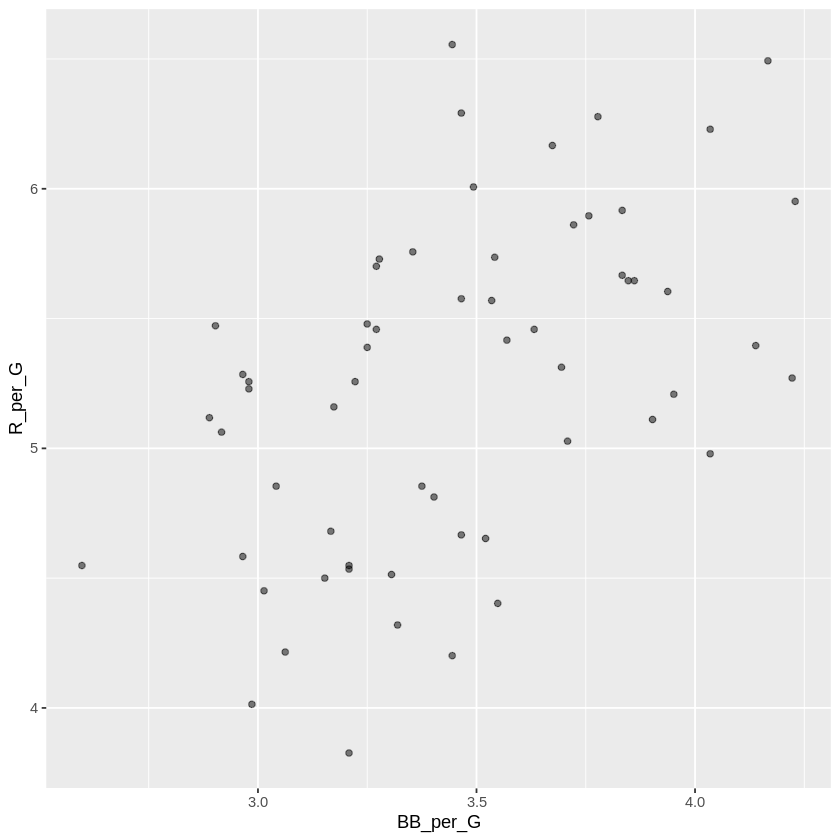

In [ ]:
# (Scatterplot & Correlation Coefficient) of BB and R 
team %>% mutate(BB_per_G = BB / G, R_per_G = R / G) %>%
  ggplot(aes(BB_per_G, R_per_G)) + 
  geom_point(alpha = 0.5)

cor(team$BB,team$R)

[1] 0.9222065

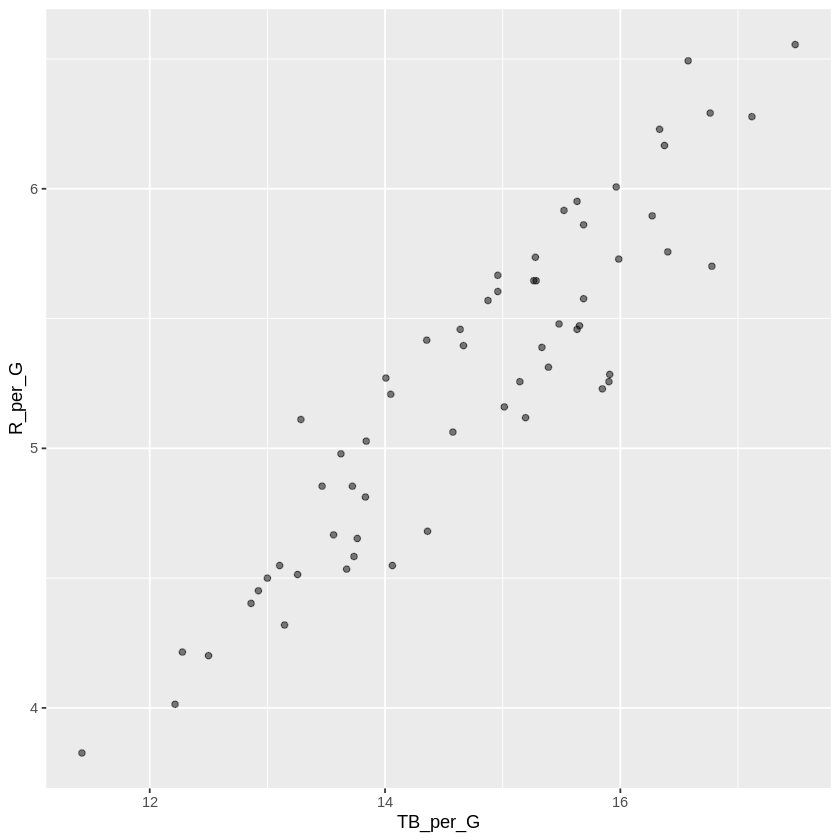

In [ ]:
# (Scatterplot & Correlation Coefficient) of TB and R 
team %>% mutate(TB_per_G = TB / G, R_per_G = R / G) %>%
  ggplot(aes(TB_per_G, R_per_G)) + 
  geom_point(alpha = 0.5)

cor(team$TB,team$R)

[1] 0.8988873

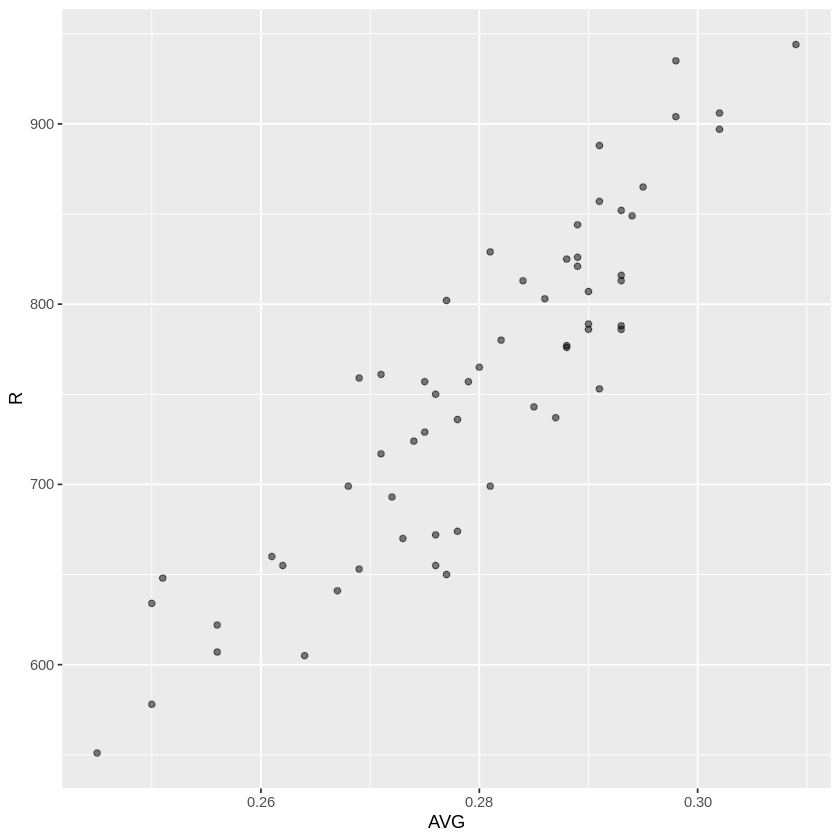

In [ ]:
# (Scatterplot & Correlation Coefficient) of AVG and R 
team %>% ggplot(aes(AVG, R)) + 
  geom_point(alpha = 0.5)

cor(team$AVG,team$R)

[1] 0.910197

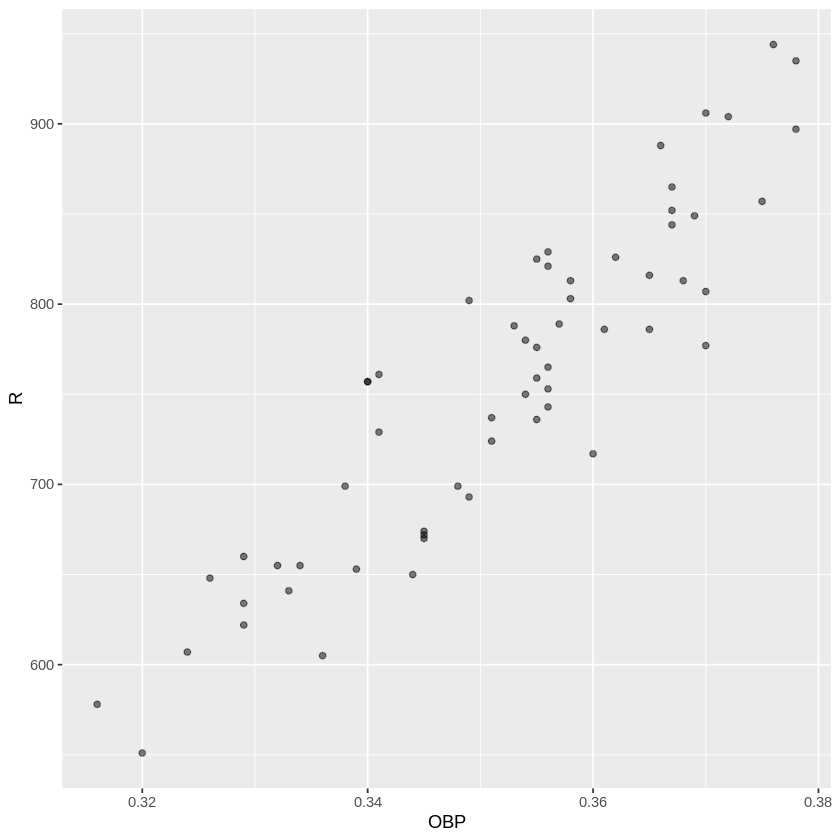

In [ ]:
# (Scatterplot & Correlation Coefficient) of OBP and R 
team %>% ggplot(aes(OBP, R)) + 
  geom_point(alpha = 0.5)

cor(team$OBP,team$R)

[1] 0.9552839

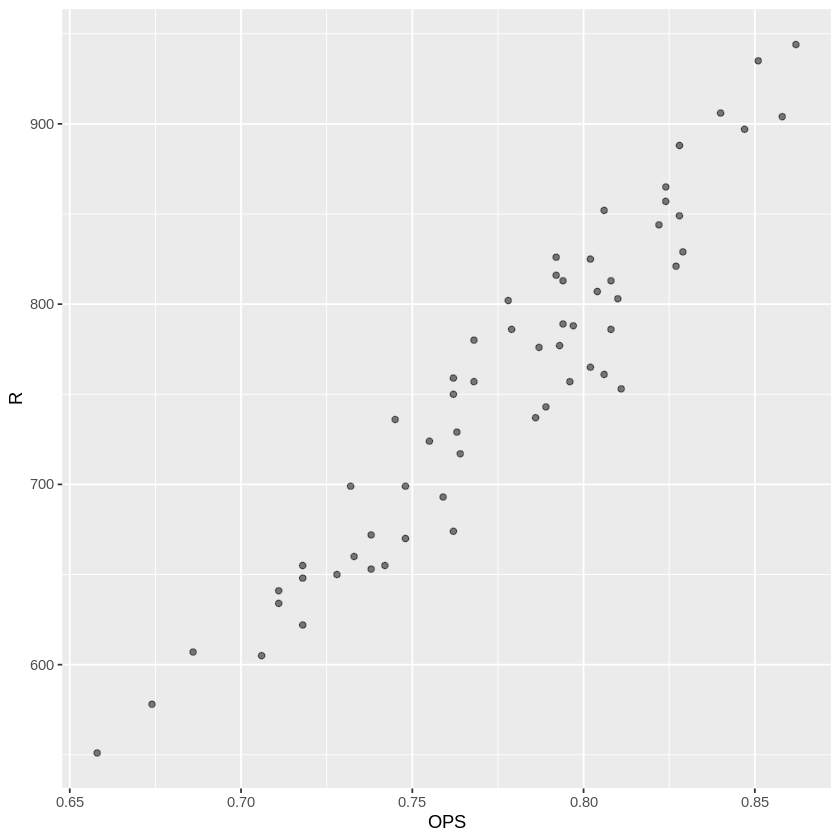

In [ ]:
# (Scatterplot & Correlation Coefficient) of OPS and R 
team %>% ggplot(aes(OPS, R)) + 
  geom_point(alpha = 0.5)

cor(team$OPS,team$R)

회귀식

In [ ]:
# regression with TB, OBP, OPS
fit <- team %>% 
  select(R,TB,OBP,OPS) %>%  
  lm(R ~ TB + OBP + OPS, data = .)

In [ ]:
 tidy(fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-755.7551451,90.5294552,-8.348168,2.073960e-11
TB,0.3839746,0.1189252,3.228707,2.081457e-03
OBP,3657.3768309,744.9200968,4.909757,8.267922e-06
OPS,-759.8924070,681.8173891,-1.114510,2.698208e-01


In [ ]:
 glance(fit)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9401278,0.9369204,23.17286,293.1087,3.397431e-34,3,-271.6454,553.2909,563.7626,30070.97,56,60


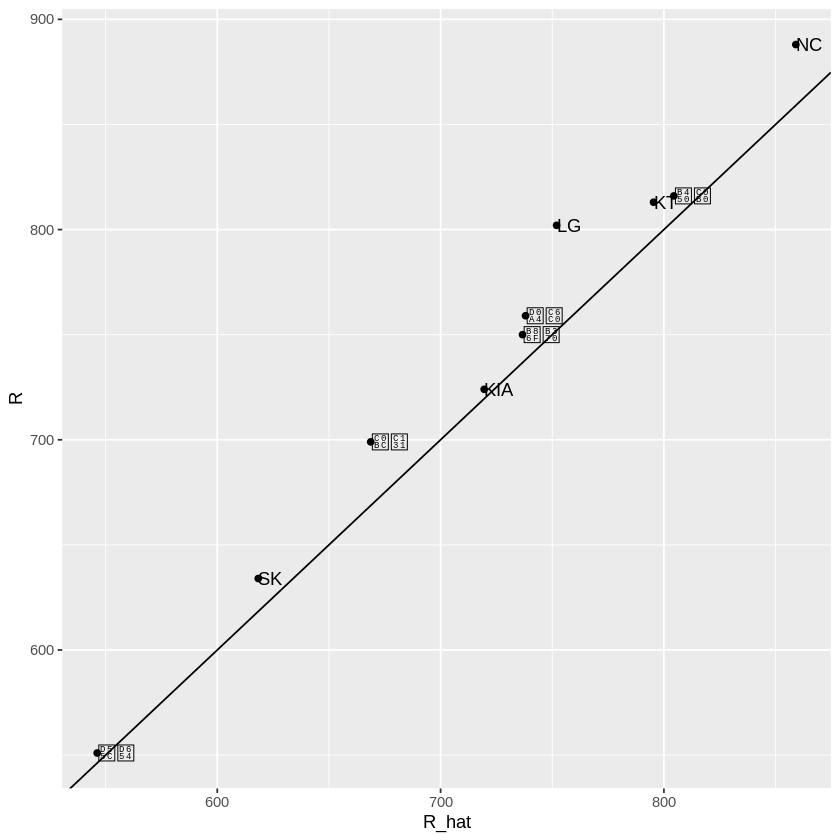

In [ ]:
# predict number of R for each team in 2020
team %>% filter(year %in% 2020) %>% 
  mutate(R = R,
        TB = TB,
        OBP = OBP,
        OPS = OPS) %>% 
  mutate(R_hat = predict(fit, newdata = .)) %>%
  ggplot(aes(R_hat, R, label = team_name)) + 
  geom_point() +
  geom_text(nudge_x = 0.05, hjust = 0) +
  geom_abline()

선수 데이터에 득점 회귀식 접합

In [ ]:
 # 기대득점 상위 10인 선수
 player <- bat %>%
 mutate(R = R,
        TB = TB,
        OBP = OBP,
        OPS = OPS) %>% 
 mutate(R_hat = predict(fit, newdata = .))  %>%
 group_by(batter_name) %>%
 summarise(R_hat = mean(R_hat)) %>%
 arrange(desc(R_hat)) 

player[1:10,]

batter_name,R_hat
<chr>,<dbl>
이정후,159.9102
김태균,146.6998
박민우,142.8668
테임즈,139.3066
김현수,123.5572
박준태,122.2668
서건창,116.7360
김동주,113.5210
나바로,108.1480
